# The Lorenz system

The Lorenz system is the 3d nonlinear ordinary differential equation

\begin{align*}
\dot{x} &= \sigma(y-x) \\
\dot{y} &= \rho x - y - xz \\
\dot{z} &= xy - \beta z
\end{align*}

where $\sigma, \rho, \beta$ are parameters with commonly used values $\sigma = 10, \beta = 10/3, \rho = 28$. Edward Lorenz, a geophysicist at MIT, developed these equations in 1963 as a reduced model of thermal convection in a fluid between two flat plates, heated below and cooled above.  

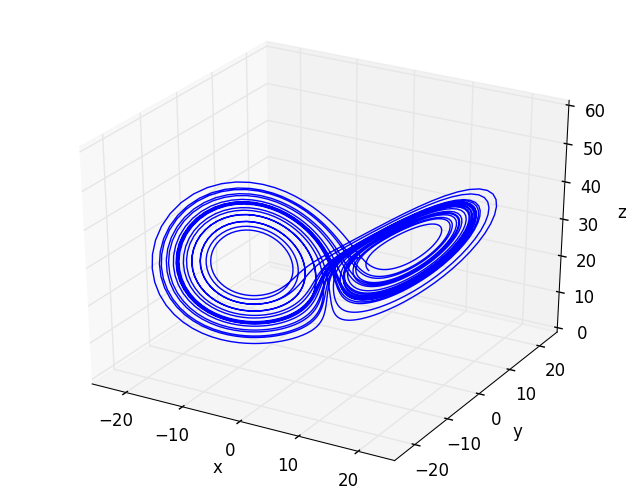

In [89]:
using PyPlot

# define Lorenz equations ẋ = f(x)
function f(x)
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]) - x[2]; x[1]*x[2] - β*x[3]]
end

σ = 10
β = 8/3
ρ = 28

# define simple 4th-order runge-kutta integrator
function rk4(f, x₀, tspan)
    x = zeros(length(tspan), length(x₀))
    x[1,:] = x₀
    
    for n=1:length(tspan)-1
        xₙ = x[n,:]
        dt = tspan[n+1] - tspan[n]
        k₁ = f(xₙ)
        k₂ = f(xₙ + k₁*dt/2)
        k₃ = f(xₙ + k₂*dt/2)
        k₄ = f(xₙ + k₃*dt)
        x[n+1,:] = xₙ + dt/6 * (k₁ + 2k₂ + 2k₃ + k₄)
    end
    return t,x    
end

# integrate ẋ = f(t,x) numerically from t=0 to t=T
T = 30.0
dt = 0.01
x₀ = [5; 0.0; 28.0]
t,x = rk4(f, x₀, 0:dt:T)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;


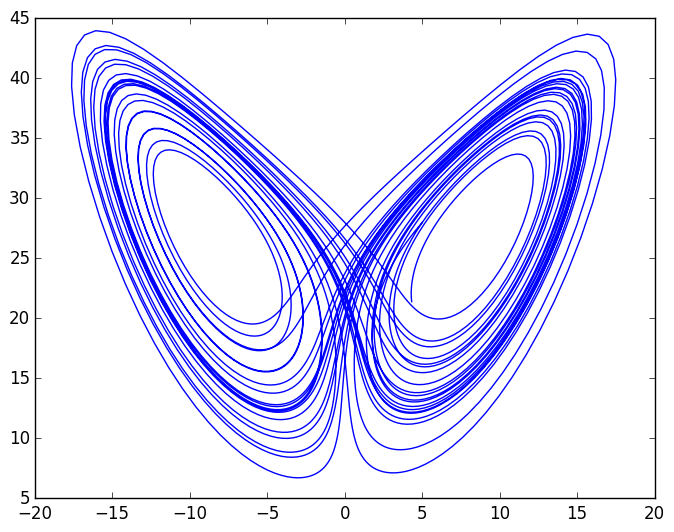

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f06fe332f10>

In [90]:
plot(x[:,1], x[:,3], "b-")

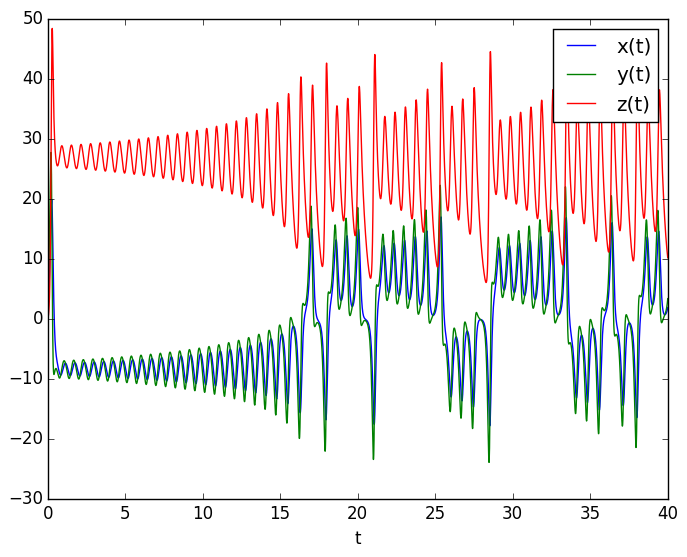

PyObject <matplotlib.text.Text object at 0x7f06ff280d10>

In [75]:
plot(t, x[:,1], "b-", label="x(t)")
plot(t, x[:,2], "g-", label="y(t)")
plot(t, x[:,3], "r-", label="z(t)")
legend()
xlabel("t")

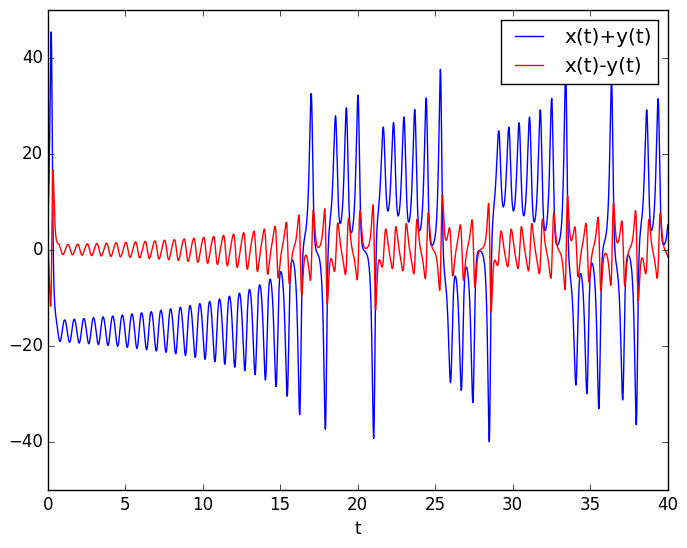

PyObject <matplotlib.text.Text object at 0x7f06ff3dbfd0>

In [76]:
plot(t, x[:,1]+x[:,2], "b-", label="x(t)+y(t)")
plot(t, x[:,1]-x[:,2], "r-", label="x(t)-y(t)")
legend()
xlabel("t")

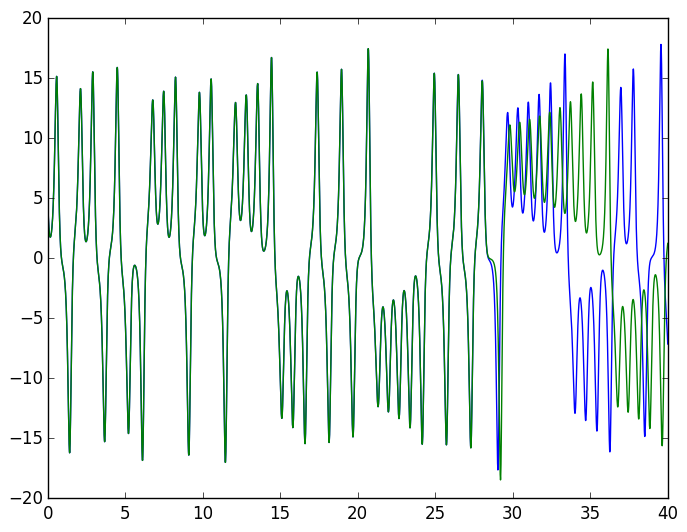

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f06fdc83490>

In [100]:
# integrate ẋ = f(t,x) numerically from t=0 to t=21
t = 0:0.01:40.0
x₀ = [5; 0.0; 28.0]
ϵ  = [0.000000000001; 0.0; 0.0]
t1,x1 = rk4(f, x₀, t)
t2,x2 = rk4(f, x₀+ϵ, t);
plot(t1, x1[:,1], "b-")
plot(t2, x2[:,1], "g-")

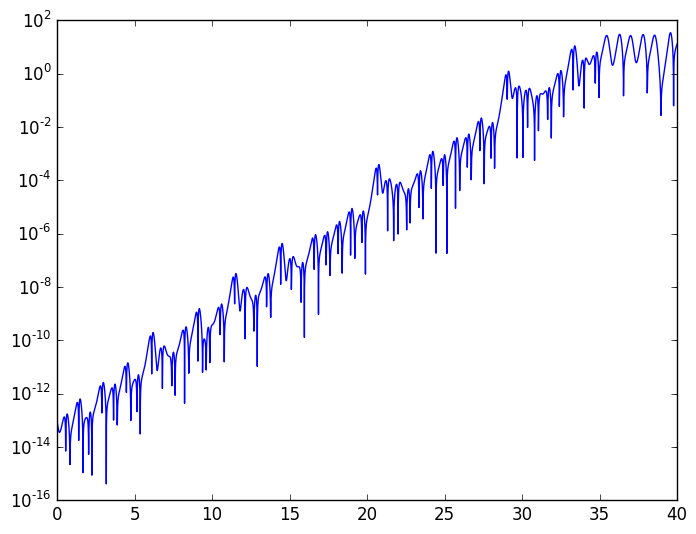

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f06fe690d10>

In [97]:
# integrate ẋ = f(t,x) numerically from t=0 to t=21
t = 0:0.01:40.0
x₀ = [5; 0.0; 28]
ϵ  = [0.0000000000001; 0; 0]
t1,x1 = rk4(f, x₀, t)
t2,x2 = rk4(f, x₀+ϵ, t);
semilogy(t1, abs.(x1[:,1]-x2[:,1]), "b-")